# Calculate CO2-eq concentration from forcing time series

this is basically the CO2-fe number from Myles and Stuart

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [2]:
df_forcing = pd.read_csv('../data/ERF_best_aggregates_1750-2023.csv', index_col=0)
# Source: Indicators of Global Climate Change 2023, Forster et al. (2024)

In [3]:
# get GHG forcings
# all WMGHGs + ozone (assume most effect is LW) + stratospheric WV from methane
# assume 50% of ozone and all WV is LW
# the 50% comes from supplement of Skeie et al., 2020 https://static-content.springer.com/esm/art%3A10.1038%2Fs41612-020-00131-0/MediaObjects/41612_2020_131_MOESM1_ESM.pdf
ghg_lw_forcing = df_forcing['CO2'] + df_forcing['nonco2wmghg'] + 0.5 * df_forcing['O3'] + df_forcing['H2O_stratospheric']

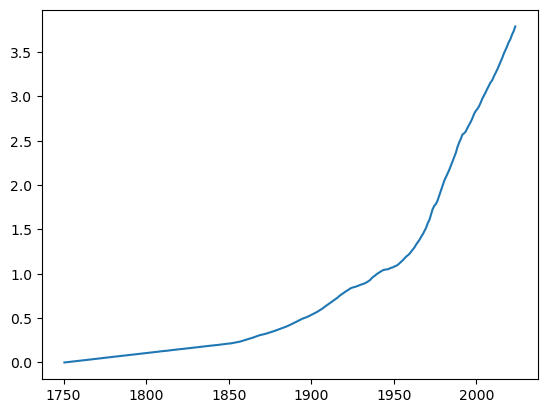

In [4]:
pl.plot(ghg_lw_forcing)

In [5]:
# use rescaled Myhre 1998 relationship
co2_conc_1750 = 278.377857
f2x = 3.93

In [6]:
alpha = f2x / np.log(2)
alpha

5.669791510693627

In [7]:
co2_conc_eq = co2_conc_1750 * np.exp(ghg_lw_forcing / alpha)

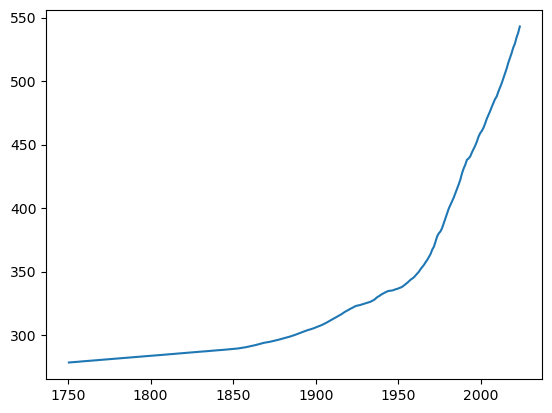

In [8]:
pl.plot(co2_conc_eq)

(5.8, 6.35)

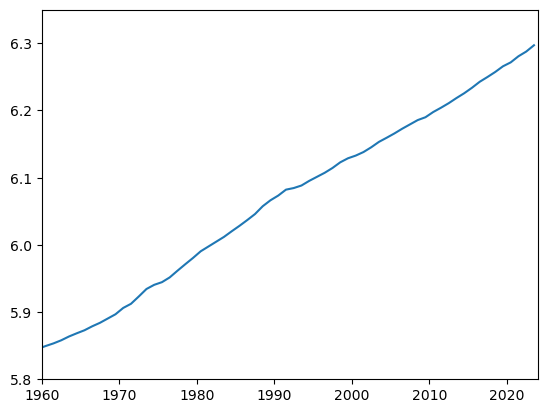

In [9]:
pl.plot(np.log(co2_conc_eq))
pl.xlim(1960, 2024)
pl.ylim(5.8, 6.35)

In [10]:
df_out = pd.concat((co2_conc_eq, np.log(co2_conc_eq)), axis=1)
df_out.columns = ['CO2_eq_conc_ppm', 'log_CO2_eq_conc']
df_out

,CO2_eq_conc_ppm,log_CO2_eq_conc
1750.5,278.377857,5.628979
1751.5,278.468916,5.629306
1752.5,278.570963,5.629673
1753.5,278.677057,5.630054
1754.5,278.797476,5.630486
...,...,...
2019.5,526.230618,6.265740
2020.5,529.317400,6.271588
2021.5,534.170199,6.280715
2022.5,537.900904,6.287674


In [11]:
df_out.to_csv('../output/co2_eq_conc.csv')